# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

This is the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided to us by Udacity, and it will be our job to implement the additional functionality necessary to successfully complete this project. However, in addition to the implementation sections that was required by Udacity I also added extra visualizations from my own study and understanding.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MDEV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MDEV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MDEV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, learning_curve

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 30)

#plt.style.use('seaborn-whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [4]:
rnd_seed=23
np.random.seed(rnd_seed)

In [5]:
# Load the Boston housing dataset
data = pd.read_csv('data/housing.csv')

In [6]:
prices   = data['MDEV']
features = data.drop('MDEV', axis = 1)

In [7]:
# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MDEV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [8]:
# TODO: Minimum price of the data
minimum_price = prices.min()

# TODO: Maximum price of the data
maximum_price = prices.max()

# TODO: Mean price of the data
mean_price = prices.mean()

# TODO: Median price of the data
median_price = prices.median()

# TODO: Standard deviation of prices of the data
std_price = prices.std(ddof=0)

In [9]:
# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


In [10]:
# We can also get the above statistics using the describe() method
with pd.option_context("display.float_format",'{:,.0f}'.format):
    data['MDEV'].describe()

count         489
mean      454,343
std       165,340
min       105,000
25%       350,700
50%       438,900
75%       518,700
max     1,024,800
Name: MDEV, dtype: float64

### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MDEV'` or a **decrease** in the value of `'MDEV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: **

* RM is the average number of rooms among homes in the neighborhood. The price of a three room house is likely to be less than the price of a five/six room house. People seek more rooms for luxury. It's likely that the increase in room number will lead to an increase in the house price.

* LSTAT is the percentage of the Boston homeowners who had a greater networth than the homeowners in the neighborhood. If the neighborhood is poor, then it's likely the LSTAT will be high as more Boston homeowners will have a higher networth than the homeowners of the respective neighborhood. In a poor neighborhood, the house price is low. People seek good or affluent neighborhods, so it has an inverse relationship with price. It's likely that increase in LSTAT will lead to a decrease in the house price MDEV.

* PTRATIO is the ratio of students to teachers in the primary and secondary school in the neighborhood. If PTRATIO is 12/1 it means 1 teacher has to attend to at least 10 students. In poor neighborhoods there's often not enough funds in schools to hire more teachers. If PTRATIO is low that means the schools have more teachers available for students which indicate better care to each student. Thus I'd assume higher PTRATIO will correspond to a poor neighborhood where the house prices will be low, thus PTRATIO has a inverse relationship with house price.

To confirm this intuition a pairplot of MDEV is created against the three values, RM, LSTAT and PTRATIO. RM shows a positive relationship, LSTAT shows a negative one and PTRATIO also shows a strict negative relationship after 20 and moderative negative relationship before 20 with some occassional upper end prices.

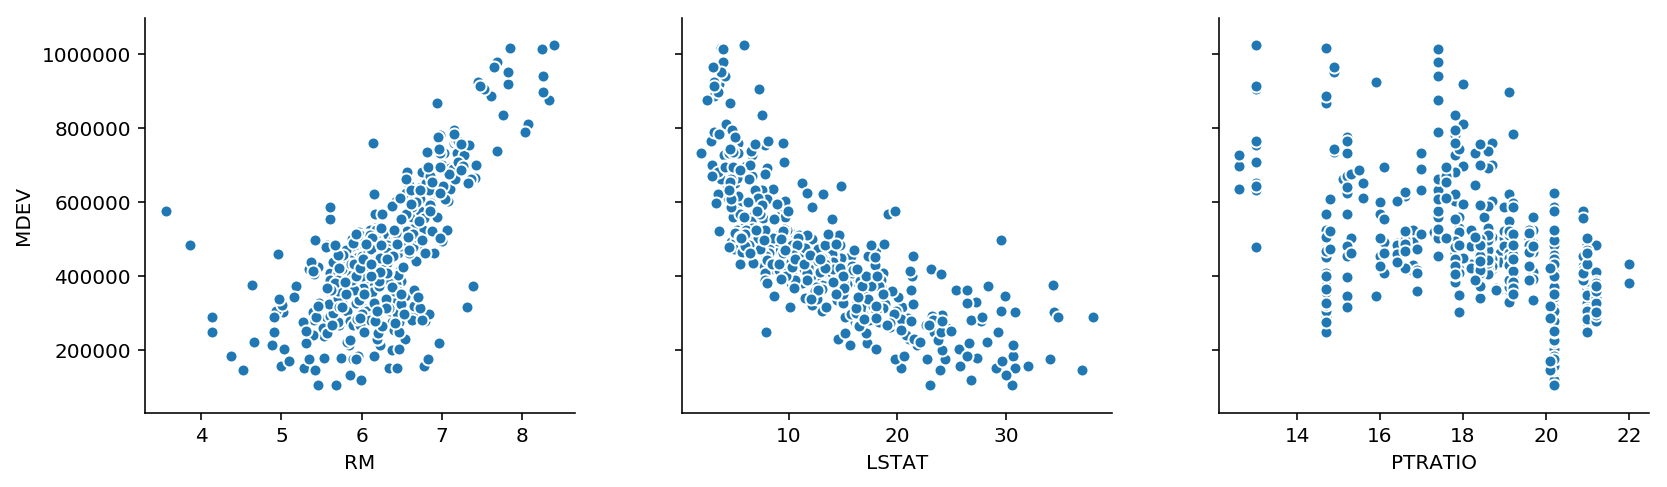

In [11]:
g = sns.pairplot(data, x_vars = ["RM","LSTAT","PTRATIO"], y_vars = ["MDEV"], kind = "scatter")
g.fig.set_size_inches(12 , 4);

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [12]:
# TODO: Import 'r2_score'

from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [13]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** 

$R^2$ captures the percentage of squared correlation between the predicted and actual values of the target variable and it ranges from 0 to 1 where close to 1 means better performance. This model has a $R^2$ score of 0.923 which means that the model is capable explaining 92.3% of the variance in the target variable, it appears that the model has been able to successfully capture the variation of the target variable. However, it must be kept in mind that $R^2$ only makes sense when the underlying assumption for a linear model holds valid i.e. there exists a linear relation betwwn the features and the target variable. If the linear relation is violated then even if $R^2$ is high it does not signify much.

### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [14]:
# TODO: Import 'train_test_split'

from sklearn.model_selection import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=rnd_seed)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

If we train and test our model on the same data set, the model would be good at predicting as it has already seen the data. But it would give a false sense of high performance(with respect to the evaluation metric we choose). The end goal of a machine learning model is to make accurate predictions on the data it has not seen before. 

If we split the dataset into training and testing sets, then we can train the model on the training data and test it on the independent testing dataset. After assessing the model's performance on the testing data set that the model has not seen before, we can be more confident about it's performance and generalization.

So we split the data set into training and testing subsets to avoid overfitting and to test the model's performance against a data set it has not seen before.

----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

In [15]:
def model_learning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size=0.2, random_state=rnd_seed)

    # Generate the training set sizes increasing by 50
    #train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)
    train_sizes = np.linspace(1, np.floor(X.shape[0]*0.8), 9).astype(int)

    # Create the figure window
    fig = plt.figure(figsize=(12, 8))

    # Create three different models based on max_depth
    for k, depth in enumerate([1, 3, 6, 10]):
        
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
        ax.legend(loc='best')
    
    # Visual aesthetics
    #ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize=16, y=1.03)
    fig.tight_layout()
    #fig.show()

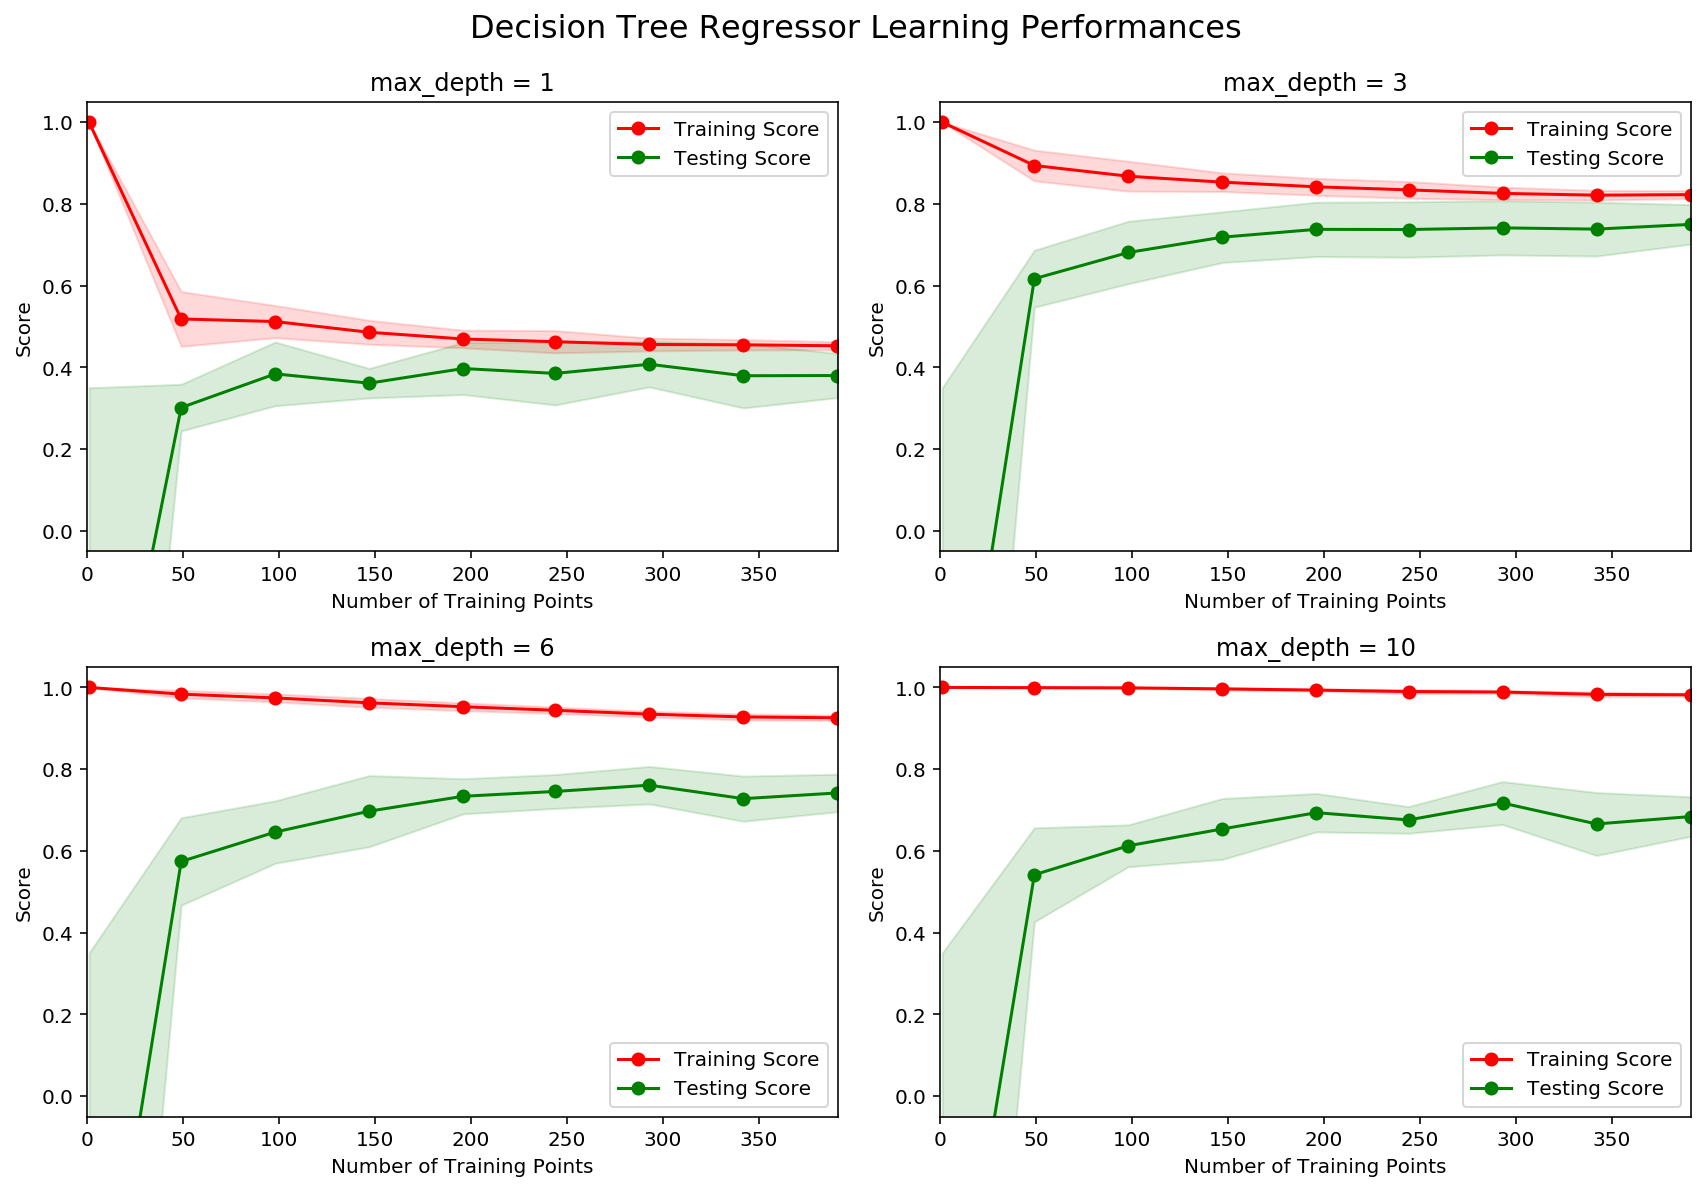

In [16]:
# Produce learning curves for varying training set sizes and maximum depths
model_learning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

###### Chosen graph = max depth 1.

Both training and testing curve is showing lower scores compared to other graphs. 

* *What happens to the score of the training curve as more training points are added?*

As more training points are being added, the score of the training curve goes down. At first it went down to around 0.6 when there was about 50 data points, but after adding more data points the score went down even furture and levelled off near 0.5 after 200 data points.

* *What about the testing curve?*

In the graph with max depth 1, the testing accuracy is near 0.4 at maximum and then mostly stays there. It achieves the maximum accuracy with 100 data points, but after that as more data gets added it does nothing to improve the performance of the testing curve.

* *Would having more training points benefit the model?*

It seems like a classic case of underfitting as the model is too simple to capture the complexities inherent in the data set. This model has high bias. This model also has low variance because the difference between the training and testing is small and alomost same throughout after training size of 200. Also the training and testing score has come to a constant values after 200 trainind size. Hence, adding more training points will not benefit the model as it will consistently under fit the data set because the model is just too simple to capture complexities of the process that developed the data.

* *Are the learning curves converging to particular scores?*

In this graph the scores seem to be converging to 0.4. In models with high bias, training and testing scores tend to converge to same low score because the model fails to capture complexities above that level systematically. This is yet another evidence to claim that this model has high bias even adding lots of data points will not improve the performance of the model significantly. Also since the difference between the training and testing is small and alomost same throughout after training size of 200 it can also be said that the model has low variance too.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

In [17]:
from sklearn.model_selection import validation_curve
def model_complexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = rnd_seed)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')
    
    train_errors, test_errors = validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'neg_mean_squared_error')    
    

    print(train_scores)
    # Find the mean and standard deviation for smoothing
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Find the mean and standard deviation for smoothing
    train_errors_mean = np.mean(-train_errors, axis=1)
    train_errors_std = np.std(-train_errors, axis=1)
    test_errors_mean = np.mean(-test_errors, axis=1)
    test_errors_std = np.std(-test_errors, axis=1)

    # Plot the validation curve
    
    # Create the figure window    
    fig = plt.figure(figsize=(16, 5))
    
    plt.subplot(121)
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, train_scores_mean, 'o-', color = 'r', label = 'Training $R^2$ Score')
    plt.plot(max_depth, test_scores_mean, 'o-', color = 'g', label = 'Validation $R^2$ Score')
    plt.fill_between(max_depth, train_scores_mean - train_scores_std, \
        train_scores_mean + train_scores_std, alpha = 0.15, color = 'r')
    plt.fill_between(max_depth, test_scores_mean - test_scores_std, \
        test_scores_mean + test_scores_std, alpha = 0.15, color = 'g')
    plt.arrow(4.0, 0.6, 0.0, 0.1, width=0.05, head_width=0.2, head_length=0.05, fc='k', ec='k')
    
    # Visual aesthetics
    plt.legend(loc = 'best')
    plt.xlabel('Maximum Depth')
    plt.ylabel('$R^2$')
    
    plt.subplot(122)
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, train_errors_mean, 'o-', color = 'r', label = 'Training RMSE')
    plt.plot(max_depth, test_errors_mean, 'o-', color = 'g', label = 'Validation RMSE')
    plt.fill_between(max_depth, train_errors_mean - train_errors_std, \
        train_errors_mean + train_errors_std, alpha = 0.15, color = 'r')
    plt.fill_between(max_depth, test_errors_mean - test_errors_std, \
        test_errors_mean + test_errors_std, alpha = 0.15, color = 'g')
    plt.arrow(4.0, 1e10, 0.0, -0.25e10, width=0.05, head_width=0.2, head_length=1e9, fc='k', ec='k')
    
    # Visual aesthetics
    plt.legend(loc='best')
    plt.xlabel('Maximum Depth')
    plt.ylabel('RMSE')
    
    #pl.ylim([-0.05,1.05])
    #pl.show()

[[ 0.46322921  0.46799665  0.4697801   0.47305242  0.47167346  0.45886503
   0.46488369  0.48340342  0.49506271  0.45017975]
 [ 0.72134397  0.72994191  0.75325916  0.74170789  0.72453464  0.72619344
   0.72855498  0.74381834  0.74509522  0.73797278]
 [ 0.83050137  0.83177906  0.84524462  0.83450719  0.82610756  0.84203581
   0.82308972  0.83353388  0.84795936  0.83367472]
 [ 0.87589509  0.87275593  0.88178994  0.88569428  0.87719827  0.88956748
   0.87477015  0.87964972  0.89589249  0.87726241]
 [ 0.89963467  0.90381338  0.90979616  0.90840478  0.90442649  0.91376827
   0.90848364  0.90645975  0.92021121  0.89931346]
 [ 0.92667154  0.92886479  0.92913529  0.92823474  0.92299723  0.92969441
   0.9352247   0.92863666  0.94088875  0.92398819]
 [ 0.94459424  0.94595299  0.94753999  0.94365885  0.94298251  0.94675322
   0.95384695  0.94861779  0.95445229  0.94197041]
 [ 0.95825447  0.96252445  0.96156868  0.95978576  0.96087458  0.96679081
   0.96685578  0.96477099  0.97048195  0.95262767]


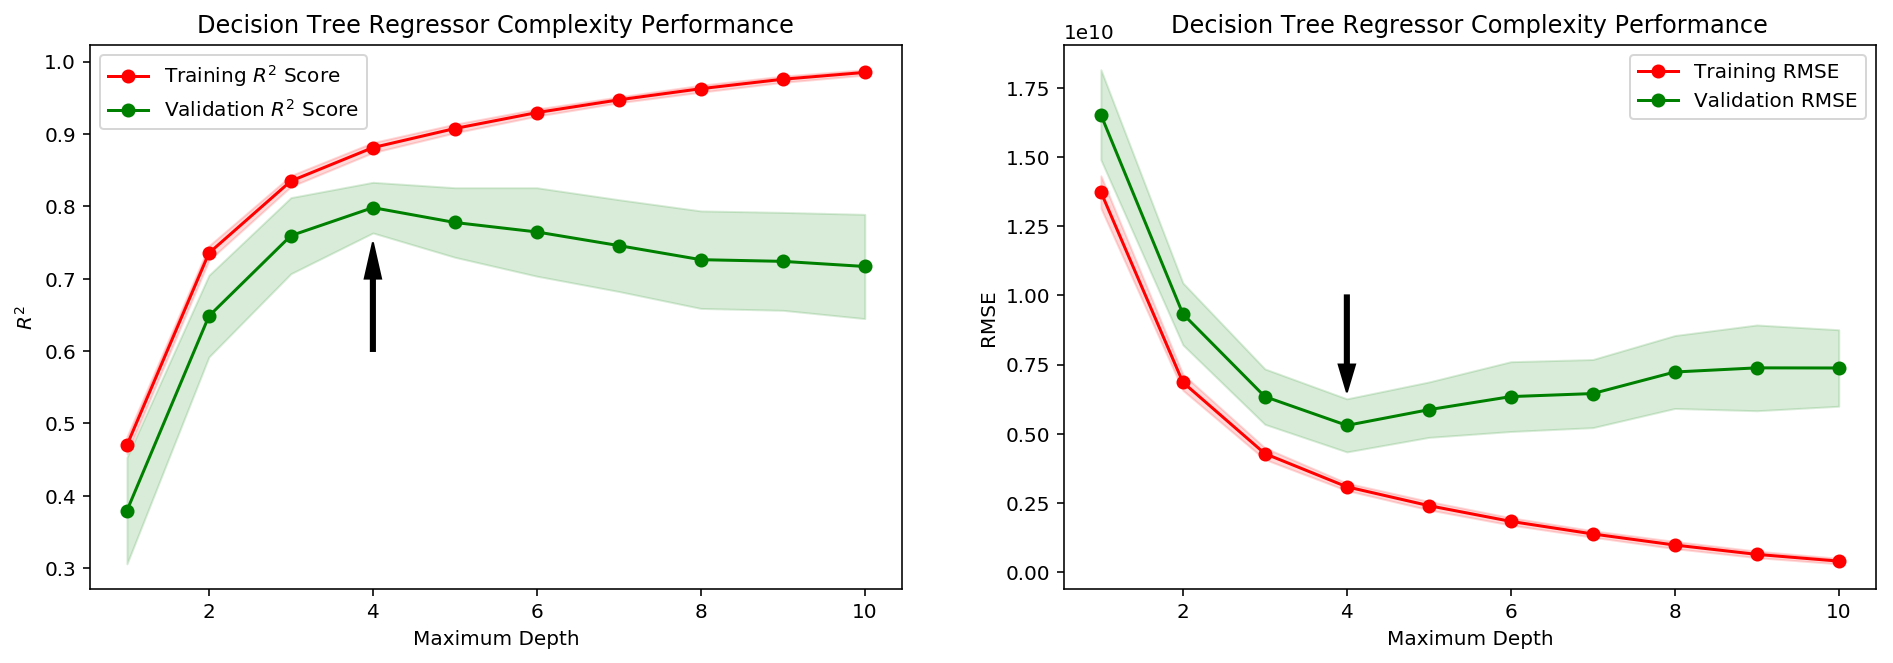

In [18]:
model_complexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **


* *When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?* 

When the model is trained with a maximum depth of one, the model suffers from high bias because the accuracy for both training and testing score is relatively low, around 0.4 for the testing score and 0.5 for the training score. Also the gap between the training score and validation score is low which signifies low variance. The model is not at all complex hence the variance is low.

This suggests the model failed to capture the complex relationships inherent in the data set and suffers from underfitting. This is a classic case of high bias and low variance.


* *How about when the model is trained with a maximum depth of 10?* 

When the model is trained with a maximum depth of 10 the difference between training score and testing score is pretty high. Training score is showing as 'near accurate'/very close to one while testing score is around 0.7. 

This suggests that the model suffers from high variance considering it has very good performance on training score because it has learnt the quirks of the training dataset and overfitted to it.

However, it fails to generalize it's predictions to the testing dataset because of overfitting. This is a classic case of suffering from low bias and high variance. 


* *What visual cues in the graph justify your conclusions?*

With max depth one the training score and testing score is pretty close and both of them are low scores. This was the visual cue for high bias because models with high bias converge to similar low training and testing scores and underfits the data. Also the models with low variance the gap between the errors (or score) does not differ much because the model underfits and hence the error(score) is high(low) in both training as well as testing sets.

In max depth 10 the visual cue was the big gap between training and testing score and the training score being close to one. This suggested the model has overfitted the training data and scored very high on it, while it failed to generalize to the testing data.

### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

I think the model with max depth 4 best generalizes to the unseen data because it has the highest testing score which is very close to 0.8 and that's also the depth where the difference between the training score and the testing score is really small. The testing score keeps improving till the depth of four.

Above the depth of four, the training score of the model keeps increasing and goes to one but the testing score keeps decreasing while the gap between the training and testing scores also increases.This signals overfitting and a high variance model. Those models will not be able to generalize over independent data sets.

Under the depth of four the gap between training and testing score is low, but the score it self is really low which signals underfitting and high bias. Those models will not be able to capture the complexities of the data sets for both training and testing sets.

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

Many Learning algorithms tend to have parameters that can be tuned for optimal model performance over a particular data set. However, figuring out the best combination of the parameters manually can be a lengthy process. 

Grid Search automates this process by taking a grid of different parameter names and their values trying out multiple combinations of the given parameters over an estimator/model to find out the best combination for those parameters under the chosen evaluation metric to determine the best model. This way we can optimize a learning algorithm by choosing the model with the best parameter combination returned by the grid search. Note that Grid Search will exhaustively try all combinations of the given parameters instead of a random sample of the parameters.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

* What is the k-fold cross-validation training technique? 

When we train a model we want to use as much data as possible, but we also want to test our model using as much different data as possible. As we split the data into training and testing sets, we have to make a trade off when we pick the amount of data that will go into the training set vs the amount of the data that will go to the testing set.

K-fold cross validation overcomes this problem by randomly splitting the data into k subsets. For k iterations, each time one subset of the data set as hold out set for testing and the rest k-1 set goes into training the model. This way we can evaluate the model's performance k times and the average score over the k iterations is likely to be a good predictor of the model's actual performance over new unssen data sets. Thus we can use the same dataset k times without repeating the exact sample. This helps the model to generalize it's predictions well to unseen data as compared to the situation where we only split the data set into two subsets, training and testing and evaluating performance only once and only on one partition of the data. With K-Fold cross validation the model learns from the whole data set and performs testing on the entire data sets leading to better performance and more accurate evaluations.

* What benefit does this technique provide for grid search when optimizing a model?* 

When Grid Search technique is trying out different combinations of the given parameters for the model, if it evaluates the model only by splitting the data into two subsets, training and testing it can easily return an overfitted model which has learnt only the quirks of the training subset. Not to mention in this case we will not be using the whole data set for training and testing either, k-fold cross validation can be combined the grid search technique to ensure that the grid-search is choosing the model that best generalizes instead of the model that overfits.

In this case we will provide the grid search with some parameters and a given model and the data set. The k-fold cross validation will evaluate the grid search's chosen model with some combination of the parameters in each iteration and return the average score. Grid Search will choose the model that performed best on k-fold cross validation and return that model with the chosen combination of the parameters.

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [19]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
#from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.20, random_state=rnd_seed)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {"max_depth":(1,2,3,4,5,6,7,8,9,10)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_func = make_scorer(performance_metric) # as performance metric is R^2 which is a scoring function, not a loss function
                                                  # greater_is_better defaults to true

    # TODO: Create the grid search object
    # grid = GridSearchCV(regressor, params, cv=cv_sets, scoring=scoring_func)
    # experimenting with multiple scoring function
    grid = GridSearchCV(regressor, params, cv=cv_sets, refit='r2_score', \
                        scoring={'r2_score': scoring_func, 'neg_mse':'neg_mean_squared_error'})

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [20]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

The optimal model has the max depth of four which is same with that of the initial guess. The initial guess was that choosing the model with max depth of four would be the optimal choice because the difference between training and testing score was small and the testing score was the highest near 0.8 at the max depth of four in the model complexity graph. 

However, since the grid search has choosen the model with max depth of four it verifies the assumption.  

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [21]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

In [22]:
predictions = reg.predict(client_data)

In [23]:
# Show predictions
for i, pred in enumerate(predictions):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, pred))

Predicted selling price for Client 1's home: $314,475.00
Predicted selling price for Client 2's home: $236,406.38
Predicted selling price for Client 3's home: $954,333.33


**Answer: **

### Stats from the data exploration section :

The statistics from the data exploration section looks like(all in USD) : 

In [24]:
with pd.option_context("display.float_format",'{:,.0f}'.format, "display.max_columns", 5):
    data[["RM","LSTAT","PTRATIO"]].describe()

,RM,LSTAT,PTRATIO
count,489,489,489
mean,6,13,19
std,1,7,2
min,4,2,13
25%,6,7,17
50%,6,12,19
75%,7,17,20
max,8,38,22


In [25]:
with pd.option_context("display.float_format",'{:,.0f}'.format, "display.max_columns", 5):
    prices.describe()

count         489
mean      454,343
std       165,340
min       105,000
25%       350,700
50%       438,900
75%       518,700
max     1,024,800
Name: MDEV, dtype: float64

**Visualize the client data: The points marked with '\*' are the sample clients**

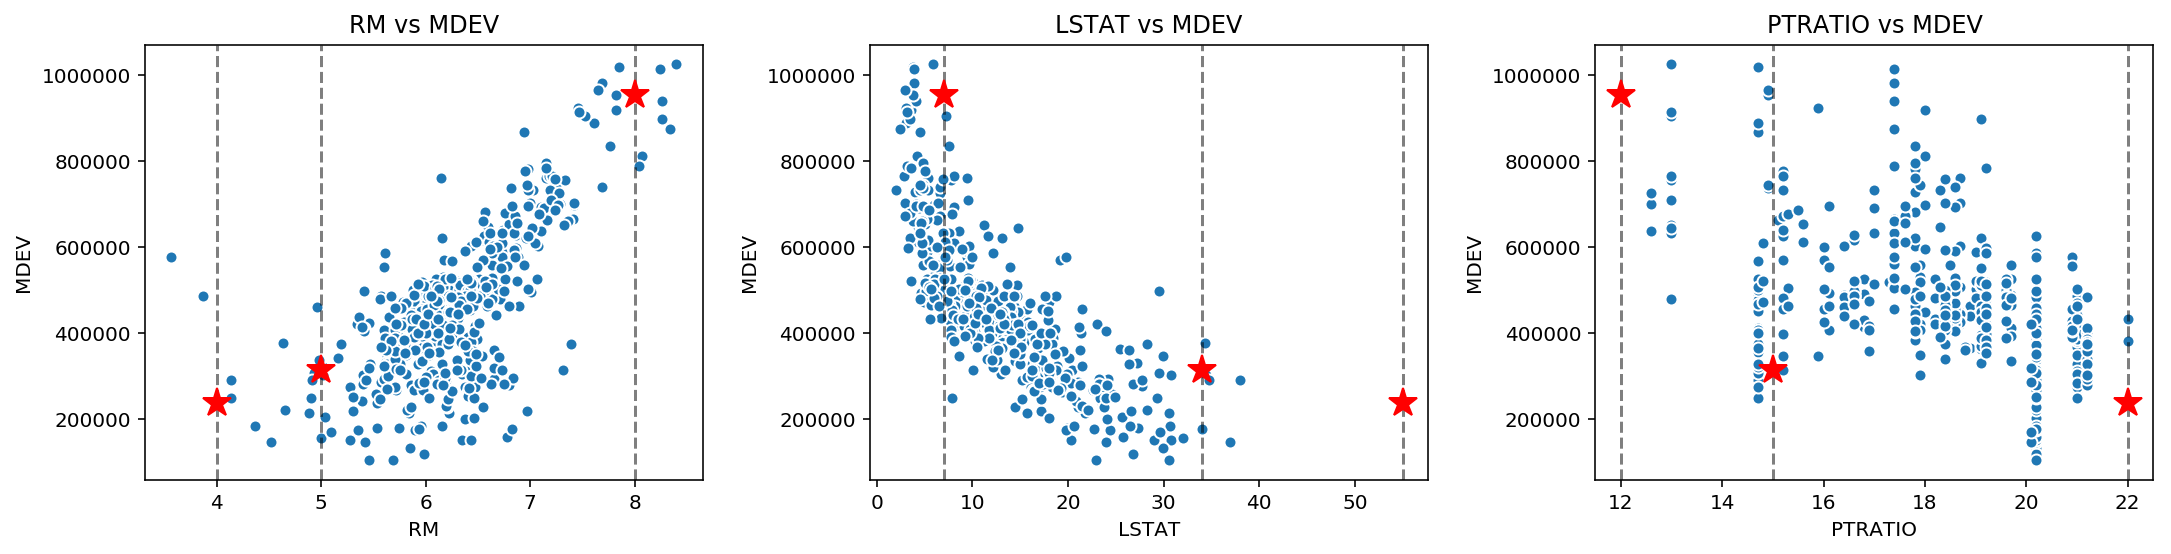

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))
_= ax[0].scatter(data["RM"], data["MDEV"], marker="o", edgecolor='w')
_= ax[0].set(xlabel='RM', ylabel="MDEV", title="RM vs MDEV")
for rm, pred in zip([row[0] for row in client_data], predictions):
    _= ax[0].axvline(rm, linestyle='--', color='k', alpha=0.5)
    _= ax[0].plot(rm, pred, marker='*', color='r', markersize=15)
_= ax[1].scatter(data["LSTAT"], data["MDEV"], marker="o", edgecolor='w')
_= ax[1].set(xlabel='LSTAT', ylabel="MDEV", title="LSTAT vs MDEV")
for lstat, pred in zip([row[1] for row in client_data], predictions):
    _= ax[1].axvline(lstat, linestyle='--', color='k', alpha=0.5)
    _= ax[1].plot(lstat, pred, marker='*', color='r', markersize=15)
_= ax[2].scatter(data["PTRATIO"], data["MDEV"], marker="o", edgecolor='w')
_= ax[2].set(xlabel='PTRATIO', ylabel="MDEV", title="PTRATIO vs MDEV")
for ptratio, pred in zip([row[2] for row in client_data], predictions):
    _= ax[2].axvline(ptratio, linestyle='--', color='k', alpha=0.5)
    _= ax[2].plot(ptratio, pred, marker='*', color='r', markersize=15)
plt.subplots_adjust(wspace=0.3)

###  Interpretation :

* The first client's house has 5 rooms, the household networth is top 34 percent and the student teacher ratio of nearby schools is 15 to 1. The model predicted his house should be sold for 314,475. The house has average number of RMs and similar to average PTRATIO. The PTRATIO should have pulled the price up to around 600,000, I believe the LSTAT number 34th percentile got this houses price down. The predicted price is pretty close to the median price though ( 438,900.00) so it's more or less reasonable. 


* The second client's house has four rooms, the household networth is around bottom 45 percent (so lstat would be 55) and the student teacher ratio of nearby schools is 22 to 1. From the data exploratory section we have noticed that the low household networth and high student teacher ratio is negatively correlated with the house price. The model has predicted the house price around 236,406.58 USD which is lower than the 25%. The maximum PTRATIO in this data set is also 22 and the maximum LSTAT is around 37. Given the house does seem to be owned by poor owners(with top 55% household networth greater than this household owners) and the PTRATIO is around the maximum(22), the model's predictions that this house will sale below the average house price( mean house price = 438,900.00 USD) and near the minimum price( 105,000.00) seems reasonable to me.  


* The third client's house has eight rooms, the house hold networth is around top 7 percent and PTRATIO is at the data set's minimum which is 12 to one. The maximum number of rooms in this data set also happens to be eight. Since the number of rooms is positively correlated with the price, the number of household networth and PTRATIO is negatively correlated, it appears that the models prediction this house will sale at the price of 954,333.33, which is near the maximum price (1,024,800.00) is a reasonable guess. 


* Client 1 and Client 2 have little difference in their estimated prices whereas their features vary a lot. These could have been better estimated.

###  Validation with nearest neighbors :
From the nearest neighbors algorithm(below) we can see that the numbers for the predictions made by the decision-tree-regressor are pretty close, at least between one standard deviation above/below the predictions made by nearest neighbors.

In [27]:
from sklearn.neighbors import NearestNeighbors

num_neighbors=5
def nearest_neighbor_price(x):    
    
    neigh = NearestNeighbors( num_neighbors )
    neigh.fit(features)
    distance, indexes = neigh.kneighbors( x )
    
    sum_prices = []
    for i in indexes:
        sum_prices.append(prices[i])
    neighbor_avg = np.mean(sum_prices)
    return neighbor_avg

In [28]:
# nearest neighbor price for client 2
print("Client 2: ${0:.0f}".format(nearest_neighbor_price(np.expand_dims([4, 55, 22], axis=0)))) # need to reshape for a single sample

Client 2: $280980


In [29]:
client_data[0]

[5, 34, 15]

In [30]:
for i, data in enumerate(client_data):
    val = nearest_neighbor_price(np.expand_dims(client_data[i], axis=0))
    print("Form Home {0}, predicted 5NN price is: ${1:.2f}, DTree price is: ${2:.2f}".format(i + 1, val, predictions[i]))

Form Home 1, predicted 5NN price is: $315840.00, DTree price is: $314475.00
Form Home 2, predicted 5NN price is: $280980.00, DTree price is: $236406.38
Form Home 3, predicted 5NN price is: $808920.00, DTree price is: $954333.33


### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable - i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [31]:
def predict_trials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)
        
        # Fit the data
        reg = fitter(X_train, y_train)
        
        # Make a prediction
        pred = reg.predict([data[0]])[0]
        prices.append(pred)
        
        # Result
        print("Trial {}: ${:,.2f}".format(k+1, pred))

    # Display price range
    print("\nRange in prices: ${:,.2f}".format(max(prices) - min(prices)))

In [32]:
predict_trials(features, prices, fit_model, client_data)

Trial 1: $332,850.00
Trial 2: $411,417.39
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $413,334.78
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $306,000.00
Trial 10: $379,125.00

Range in prices: $114,622.22


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

I believe this model should not be used in a real world setting. 

Some reasons :

* Though we get a very faded idea about ht e house pricing but the data is not dependable. The data is most probably not relevant today anymore given the house prices in US is reaching sky-high these days in urban areas. Having a housing data set from 2015-2016 would have made me more confident about the results. 

* The features seem insufficient to describe a home. Other features such as crime rate, area, distance from malls, recreation areas, the last buying price of the house, market trends, when the house was built etc. can be better predictors of the price. 

* The model doesn't seem robust to me given it's predictions ranged around 114,622.22 as observed from the sensitivity analysis. In a real world setting this model can undersale a house for 100,000 which might hurt the house owners. 

* The data collected in an urban city like Boston will definitely not be applicable in a rural city. I'd argue this model will sldo not be able to predict similar urban cities like San Fransico's house prices because of the current trend of housing price going higher. 

The model, decision tree regressor is a reasonable selection to predict housing prices, but the data set we have trained the model on is 20 years old and is not a good reflection of the current trends. Perhaps we should collect better data and train another model before making any prediction in this situation.